In [ ]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


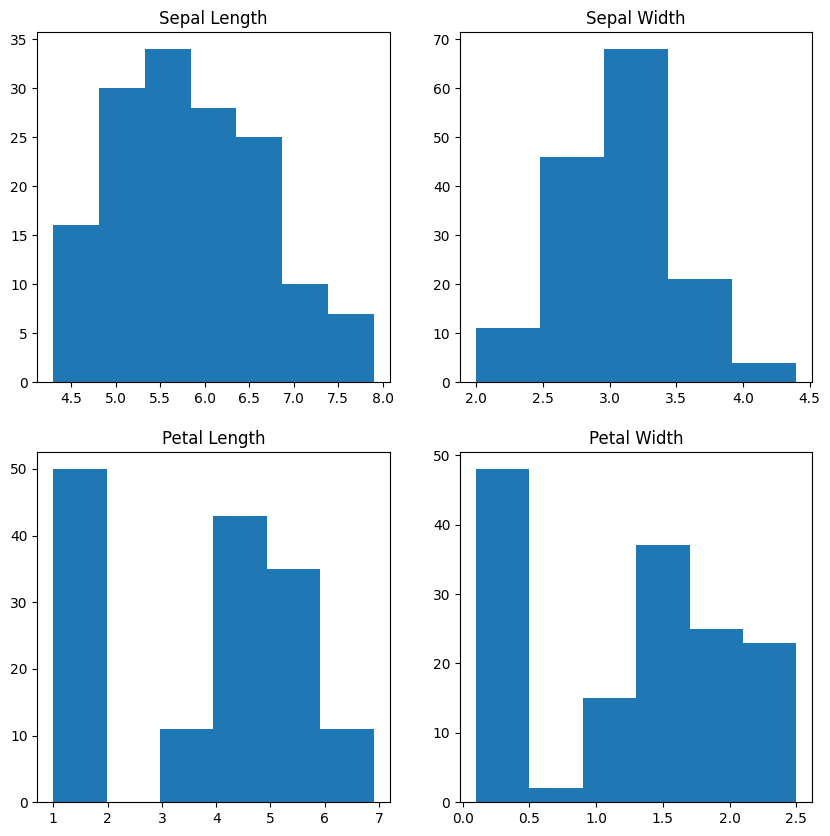

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal length (cm)'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal width (cm)'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal length (cm)'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal width (cm)'], bins=6);

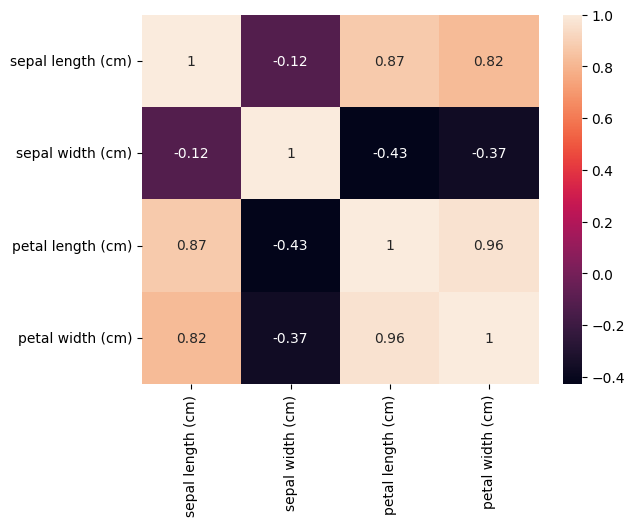

In [ ]:
sns.heatmap(df.corr(method='pearson'),annot = True)

plt.show()

In [ ]:
np.unique(y)

y_train = y[:120]
y_train.shape

y_test = y[120:]
y_test.shape

(30,)

In [ ]:
X_train = df[:120]
X_test = df[120:]

### Training the Decision Tree Classifier

In [ ]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Visualizing the Decision Tree



In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


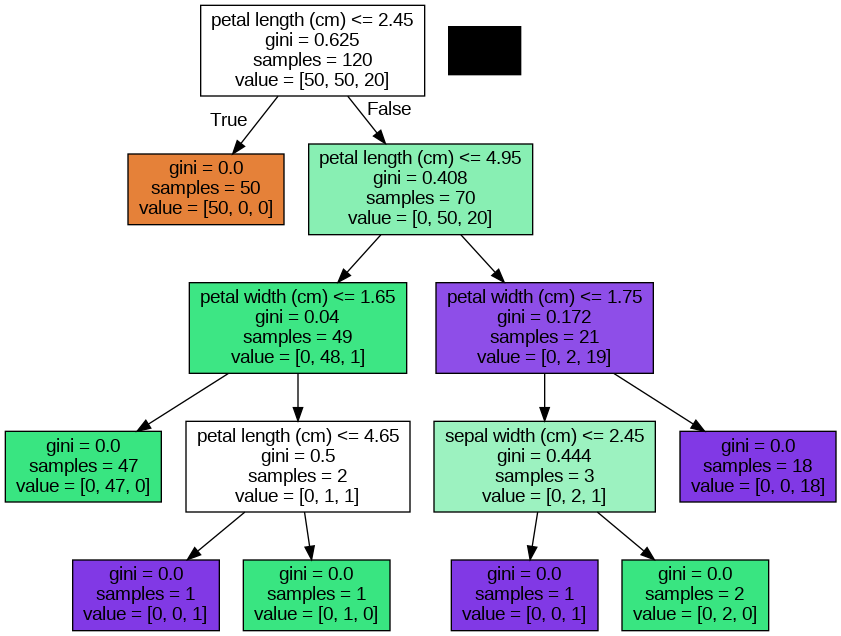

In [ ]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,
                filled=True,
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Computing accuracy scores

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(precision)
print(recall)
print(f1)

1.0
0.7333333333333333
0.846153846153846


## Checking for a sample Input

In [42]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
my_array = np.array([[6.9, 3.2, 5.7, 2.3]])  # Reshaped to a 2D array

feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

my_array_with_names = pd.DataFrame(my_array, columns=feature_names)

prediction = dtree.predict(my_array_with_names)

print(prediction)

[2]
